# Movie Industry Data Analysis using Python

---

**Analysing 4 decades of IMDb movie data (1980 - 2020)**


Data Source:https://www.kaggle.com/danielgrijalvas/movies/version/2

*Detailed explanation of data available on the Kaggle link above.*

In [165]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # config settings


In [166]:
#read in data
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [167]:
#missing data

for col in df.columns:
    share_missing = np.mean(df[col].isnull())
    print('{}--{}'.format(col,share_missing))
    
#change data type, drop na values
df = df.dropna()
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

name--0.0
rating--0.010041731872717789
genre--0.0
year--0.0
released--0.0002608242044861763
score--0.0003912363067292645
votes--0.0003912363067292645
director--0.0
writer--0.0003912363067292645
star--0.00013041210224308815
country--0.0003912363067292645
budget--0.2831246739697444
gross--0.02464788732394366
company--0.002217005738132499
runtime--0.0005216484089723526


In [168]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [169]:
df.sort_values(by = ['gross'], ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


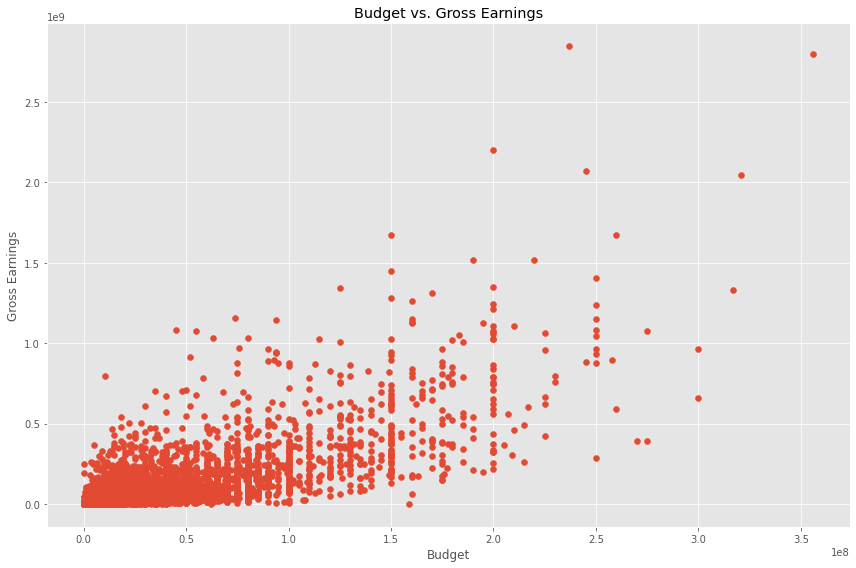

In [170]:
#correlation 
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

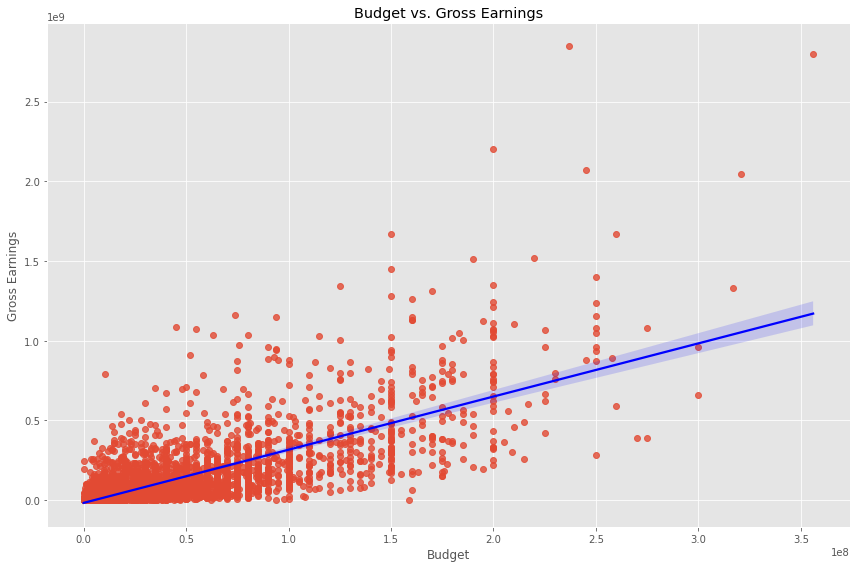

In [171]:
#Plotting Linear Regression model 
sns.regplot(x = 'budget', y='gross', data = df, line_kws={'color':'blue'})
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

In [172]:
#correlation, pearsons
correlation_matrix = df.corr()

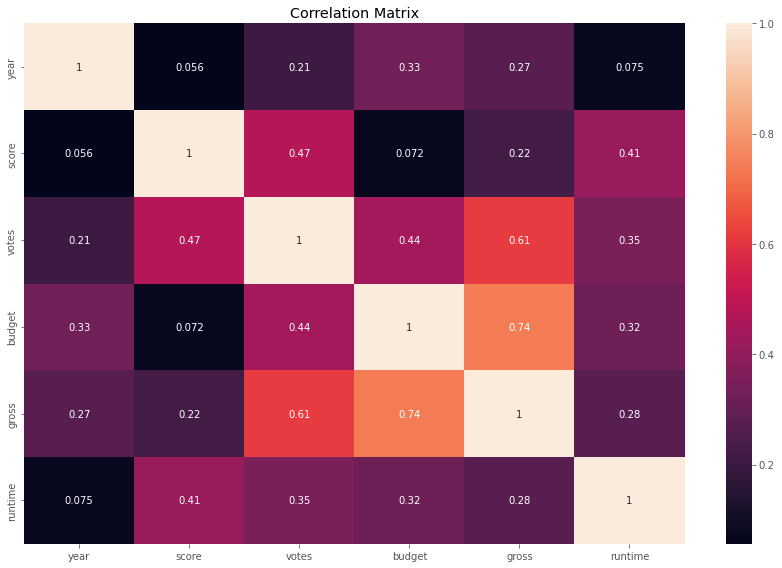

In [173]:
#visualizing using correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [174]:
#trying to check if values in year column match with date_check column (*there is probably a better way to achieve this)

#converting to string(but dtype still object)
df['releasedate'] = df['released'].astype('str')

#trying to extract year (*alternative - todatetime() could also work)
df['releasedate'].str.replace(',',"")
df['releasedate'].str.replace(' ',"")
x = df['releasedate'].str.split(r',|" "', expand=True)
df['datenew'] = x.iloc[:][1].str[0:5]

df = df.drop(['releasedate'], axis=1) # dont need this column anymore

#making both columns same dtype 
df['datenew'] = pd.to_numeric(df['datenew'])
df = df.dropna()
df['datenew'] = df['datenew'].astype('int64')
df.dtypes

#checking if years match
df['Match'] = np.where( df['year'] == df['datenew'] , 'yes', 'no')

#df[df['Match']=='0'] # we see how some years dont match in 'year' column

df['Match'].value_counts()  #702 movies had wrong release year specified

yes    4705
no      702
Name: Match, dtype: int64

In [175]:
#groupby 'genre', 'gross earnings by genre', 'avg score by genre'
grouped = df.groupby('genre', as_index=False)

print(grouped['gross'].agg(np.sum).sort_values(by ='genre',ascending=False))
print('')
print(grouped['score'].agg(np.mean).sort_values(by ='genre',ascending=False))

#summary
#df.groupby('genre').describe()

        genre         gross
14    Western      20025886
13   Thriller     296957164
12     Sci-Fi     225660614
11    Romance     167876905
10    Mystery    2003957822
9      Horror   14261055032
8     Fantasy    1634405217
7      Family    2074332587
6       Drama   52096467268
5       Crime   20014482668
4      Comedy   88513812391
3   Biography   19093786288
2   Animation   77865909110
1   Adventure   43578711908
0      Action  237752712577

        genre     score
14    Western  5.950000
13   Thriller  5.900000
12     Sci-Fi  6.350000
11    Romance  6.580000
10    Mystery  6.718750
9      Horror  5.827490
8     Fantasy  6.032500
7      Family  6.675000
6       Drama  6.720489
5       Crime  6.692172
4      Comedy  6.192905
3   Biography  7.092903
2   Animation  6.690614
1   Adventure  6.268196
0      Action  6.247878


<AxesSubplot:title={'center':'Gross Earnings and Budget by Genre'}, xlabel='Genre', ylabel='Gross Earnings, Budget'>

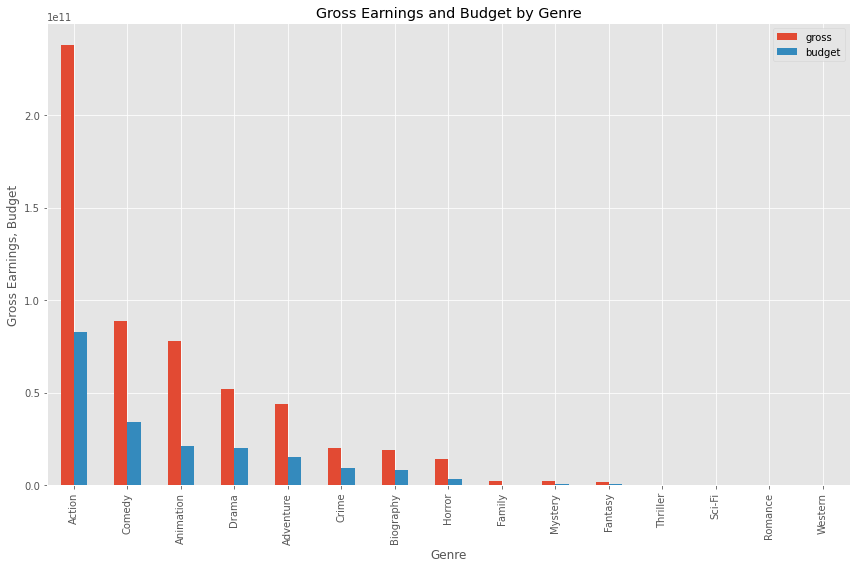

In [176]:
#plot using df.plot method
df.groupby('genre')[['gross','budget']].agg(np.sum).sort_values(by='gross',ascending=False).plot(legend=True,kind='bar', title='Gross Earnings and Budget by Genre',
                                                         xlabel='Genre', ylabel='Gross Earnings, Budget')


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'gross'}>],
       [<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'runtime'}>, <AxesSubplot:>]],
      dtype=object)

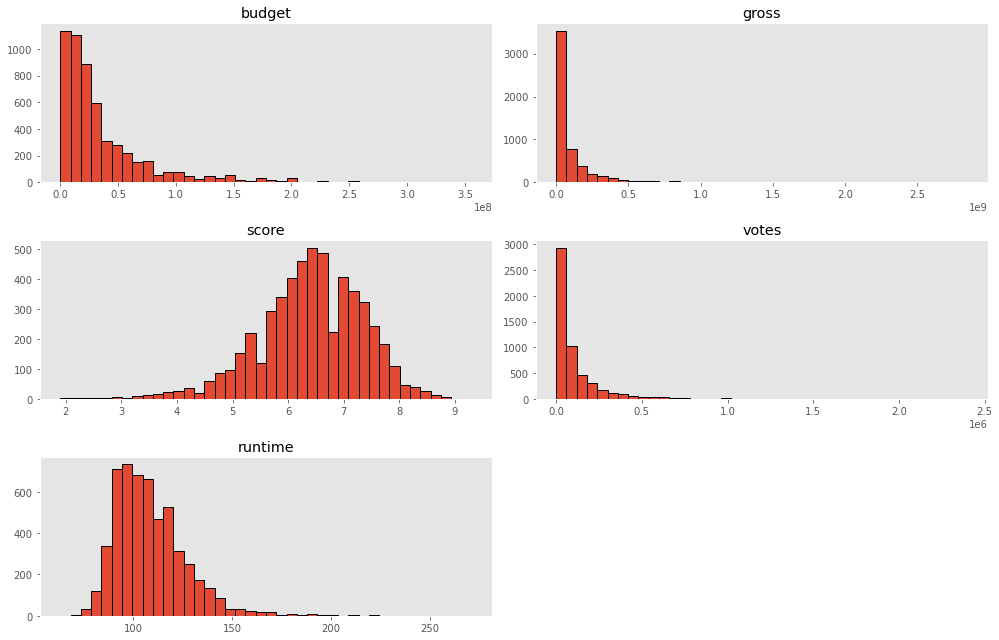

In [177]:
#columns distribution summary
df[['budget','gross','score','votes','runtime']].hist(figsize=(14,9),bins=40, linewidth='1', edgecolor='k',grid=False)

array([[<AxesSubplot:title={'center':'Action'}>,
        <AxesSubplot:title={'center':'Adventure'}>,
        <AxesSubplot:title={'center':'Animation'}>,
        <AxesSubplot:title={'center':'Biography'}>],
       [<AxesSubplot:title={'center':'Comedy'}>,
        <AxesSubplot:title={'center':'Crime'}>,
        <AxesSubplot:title={'center':'Drama'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'Fantasy'}>,
        <AxesSubplot:title={'center':'Horror'}>,
        <AxesSubplot:title={'center':'Mystery'}>,
        <AxesSubplot:title={'center':'Romance'}>],
       [<AxesSubplot:title={'center':'Sci-Fi'}>,
        <AxesSubplot:title={'center':'Thriller'}>,
        <AxesSubplot:title={'center':'Western'}>, <AxesSubplot:>]],
      dtype=object)

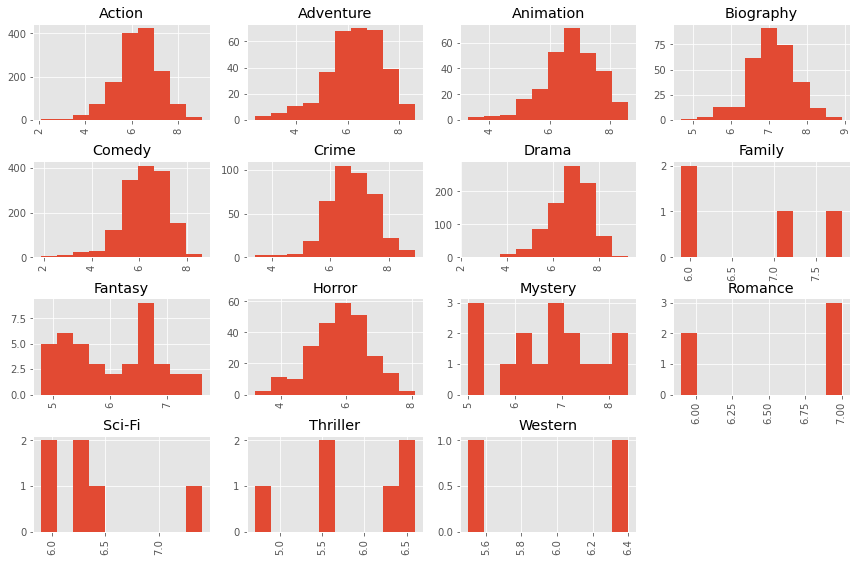

In [178]:
df.hist(column = 'score', by='genre')

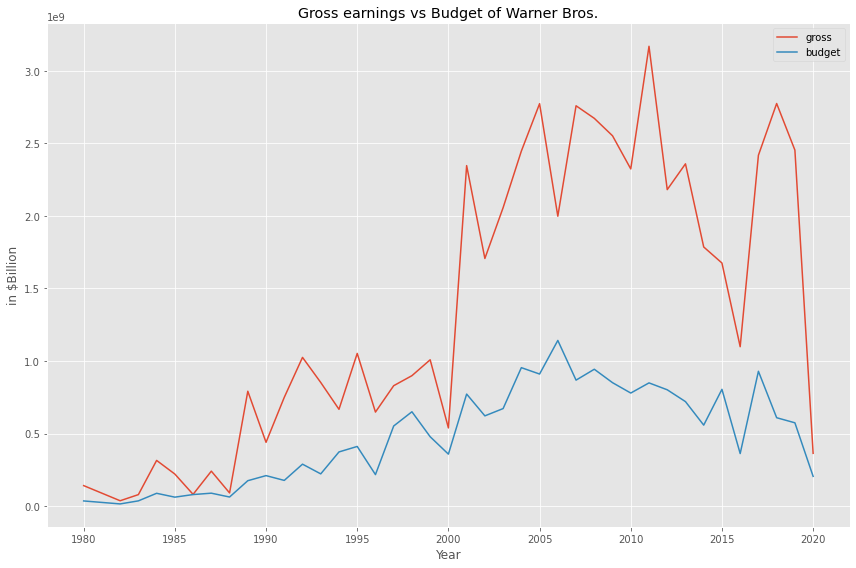

In [179]:
#grouping and aggregating (an example of warner bros production company)

company_grp_year = df.groupby(['company','datenew'])
line_plt1 = company_grp_year[['gross','budget']].sum().loc['Warner Bros.'].plot(title = 'Gross earnings vs Budget of Warner Bros.', xlabel='Year', ylabel= 'in $Billion')  #gross earnings of Warner Bros. over sample period

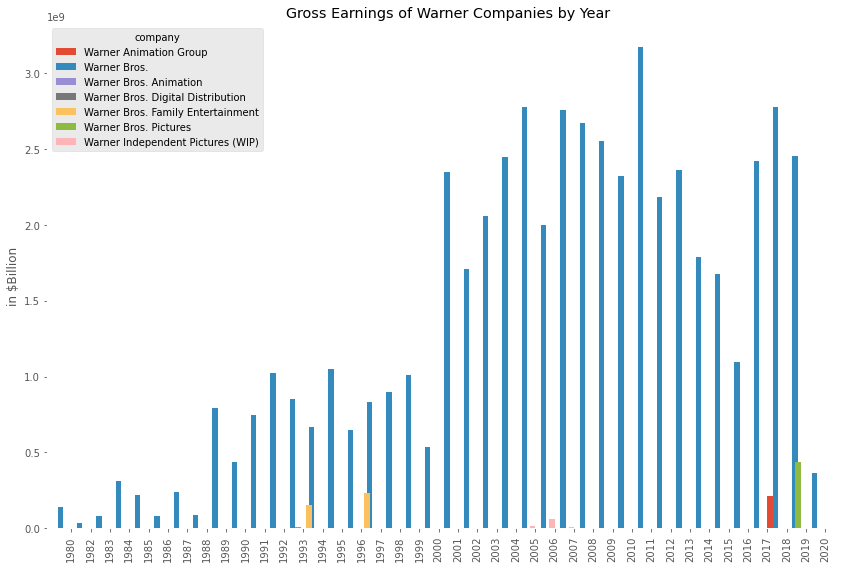

In [180]:
#but there are subsidiaries of warner bros/or there are similar names, so we need to see them separately

#we filter out warner companies from company column
filter = df['company'].str.contains('Warner', na=False)
df2 = df.loc[filter,['company','gross','datenew','budget']]
df2

#we use pivot_table to see each warner company separately
table = pd.pivot_table(df2, index=['datenew'],aggfunc=np.sum, values='gross',columns='company')
table_plot1 = table.sort_values(by='datenew').plot(kind='bar',width =2, xlabel ='',ylabel ='in $Billion',title='Gross Earnings of Warner Companies by Year')

table_plot1.set_facecolor('w')

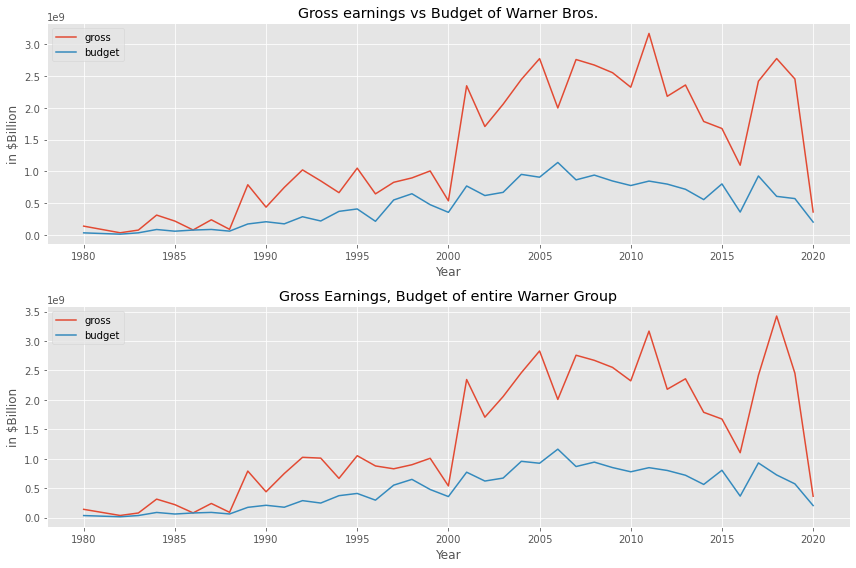

In [181]:
#using subplots

plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2) = plt.subplots(2)

new_year_grp = df2.groupby('datenew')
line_plt2 = new_year_grp[['gross','budget']].sum().plot(title = 'Gross Earnings, Budget of entire Warner Group',xlabel='Year', ylabel='in $Billion',ax=ax2)
line_plt1 = company_grp_year[['gross','budget']].sum().loc['Warner Bros.'].plot(title = 'Gross earnings vs Budget of Warner Bros.',xlabel='Year',ylabel='in $Billion', ax=ax1)

#we see that there is no big difference in earnings after including entire warner chain, top earner is Warner Bros. 
#We see variations in 1993, 1996, 2018 years (also refer to same years in bar graph above)

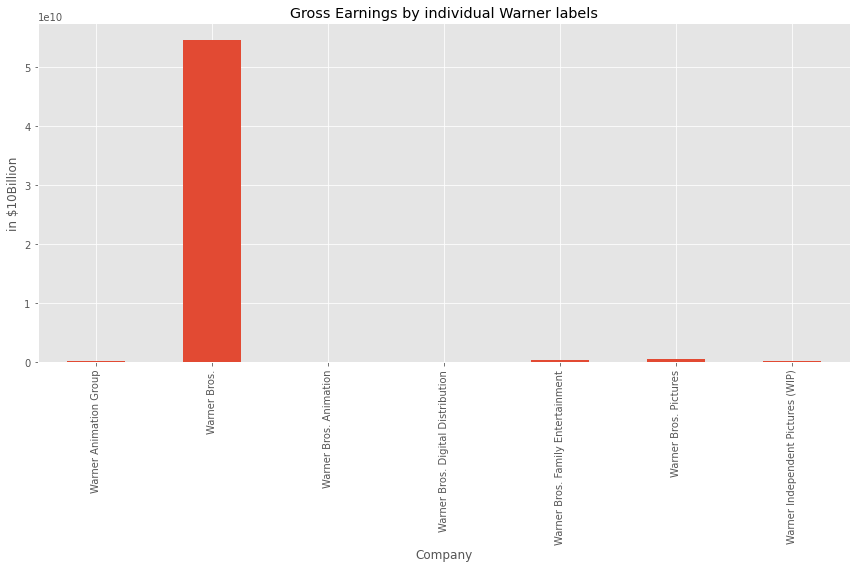

In [182]:
#if these are subsidiaries of Warner, we see that Warner Bros. brings in the most revenue.
new_company_grp = df2.groupby('company') 

plt2 = new_company_grp['gross'].sum().plot.bar(title = 'Gross Earnings by individual Warner labels', xlabel='Company',ylabel='in $10Billion')

In [183]:
#find top production companies by profit percentage

#df['budget_million'] = df['budget']/1000000
#df['gross_million'] = df['gross']/1000000
#df['profit_estimate_million'] = (df['gross'] - df['budget'])/1000000

df['budget_billion'] = df['budget']/1000000000
df['gross_billion'] = df['gross']/1000000000
df['profit_estimate_billion'] = (df['gross'] - df['budget'])/1000000000

df['profit_percent'] = np.round((df['profit_estimate_billion']/df['gross_billion'])*100,2)

#we try to add a column for no.of movies produced by each company                (alternative: use value_counts,to_dict,map)
df['movie_counts'] = 1           

#groupby 
company_grp = df.groupby(['company'], as_index=False)

#Companies sorted by profit_percentage
df3 = company_grp[['gross_billion','profit_estimate_billion','movie_counts']].sum().sort_values(by ='profit_estimate_billion', ascending=False)
df3['profit_%'] = np.round((df3['profit_estimate_billion']/df3['gross_billion'])*100,2)
df3 = df3.sort_values(by='profit_%', ascending=False)

#we see that some companies made major profit margin from a single release, which aren't necessarily the big companies
df3[:50]
    

,company,gross_billion,profit_estimate_billion,movie_counts,profit_%
1275,Solana Films,0.193356,0.193341,1,99.99
768,Haxan Films,0.248639,0.248579,1,99.98
316,Bórd Scannán na hÉireann,0.020937,0.020787,1,99.28
1135,Plunge Pictures LLC,0.054683,0.054183,1,99.09
613,Evolution Entertainment,0.103912,0.102712,1,98.85
553,ERBP,0.000545,0.000538,1,98.72
1187,Redwave Films,0.257939,0.254439,1,98.64
763,Harvest Filmworks,0.003221,0.003161,1,98.14
455,Conquering Unicorn,0.005229,0.005129,1,98.09
1358,Too Askew Prod. Inc.,0.012021,0.011771,1,97.92


In [184]:
#find gross earnings and profit% by country
country_grp = df.groupby(['country'], as_index=False)

#Countries sorted by gross revenue
df4 = country_grp[['gross_billion','profit_estimate_billion','movie_counts']].sum()
df4['profit_%'] = np.round((df4['profit_estimate_billion']/df4['gross_billion'])*100,2)
df4 = df4.sort_values(by='profit_%', ascending=False)

#we see how some countries had major movie releases making higher profit margin
#probably this IMDb data does not include all the movies, India/Bollywood movie count cannot be so low as 8.
df4


,country,gross_billion,profit_estimate_billion,movie_counts,profit_%
21,Iran,0.023860,0.023180,2,97.15
28,Lebanon,0.064417,0.060417,1,93.79
0,Argentina,0.078136,0.071336,3,91.30
43,Taiwan,0.287551,0.254551,3,88.52
23,Israel,0.011179,0.009679,1,86.58
29,Malta,0.352794,0.297794,1,84.41
32,New Zealand,6.278355,5.158255,18,82.16
30,Mexico,0.297465,0.230858,10,77.61
9,Colombia,0.012595,0.009595,1,76.18
26,Japan,2.494214,1.856114,28,74.42


        genre  score
3   Biography   7.10
11    Romance   7.00
10    Mystery   6.80
6       Drama   6.80
2   Animation   6.70
5       Crime   6.70
7      Family   6.50
1   Adventure   6.40
0      Action   6.30
4      Comedy   6.30
12     Sci-Fi   6.20
8     Fantasy   6.05
13   Thriller   6.00
14    Western   5.95
9      Horror   5.90


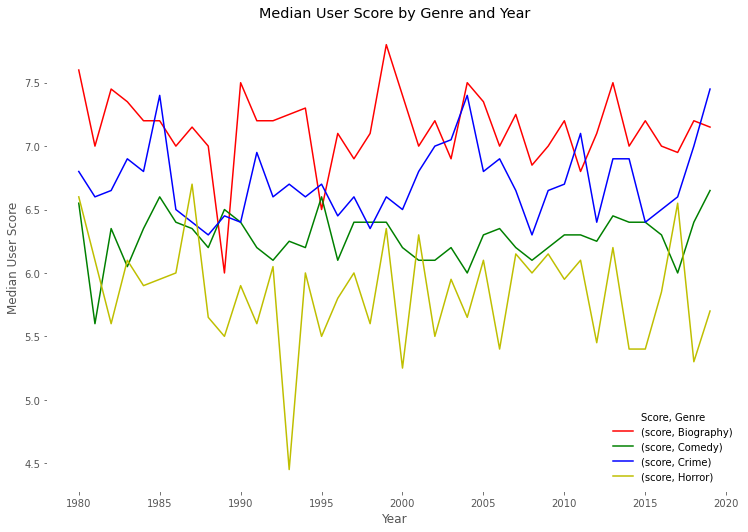

In [185]:
#scores by genre over time (was an attempt to see how people's taste evolved, *years not same for all genre ex: romance)
genre_grp = df.groupby(['genre','datenew'])
print(df.groupby('genre', as_index=False)['score'].median().sort_values(by= 'score',ascending=False))

#figure specs
plt.rcParams["figure.figsize"] = [10.50, 7.50]
plt.rcParams["figure.autolayout"] = True
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)

piv = pd.pivot_table(df, index=['datenew','genre'],aggfunc = 'median' , values=['score'])
piv_plot=piv.query('genre == ("Biography","Crime","Comedy","Horror")').unstack().plot(title='Median User Score by Genre and Year',xlabel='Year',ylabel
                                                                ='Median User Score',color=['r','g','b','y','k'])
piv_plot.set_facecolor('w')
piv_plot.legend(title='Score, Genre', loc='lower right', frameon=False)

star                 name                  
'Weird Al' Yankovic  UHF                       1
50 Cent              Get Rich or Die Tryin'    1
A.J. Cook            Final Destination 2       1
Aaliyah              Queen of the Damned       1
Aamir Khan           Talaash                   1
                                              ..
Zoey Deutch          Before I Fall             1
                     Vampire Academy           1
                     Why Him?                  1
Zooey Deschanel      500 Days of Summer        1
                     All the Real Girls        1
Name: name, Length: 5406, dtype: int64


<AxesSubplot:title={'center':'Top 50 Actors by number of movies from 1980-2020'}, ylabel='Actors'>

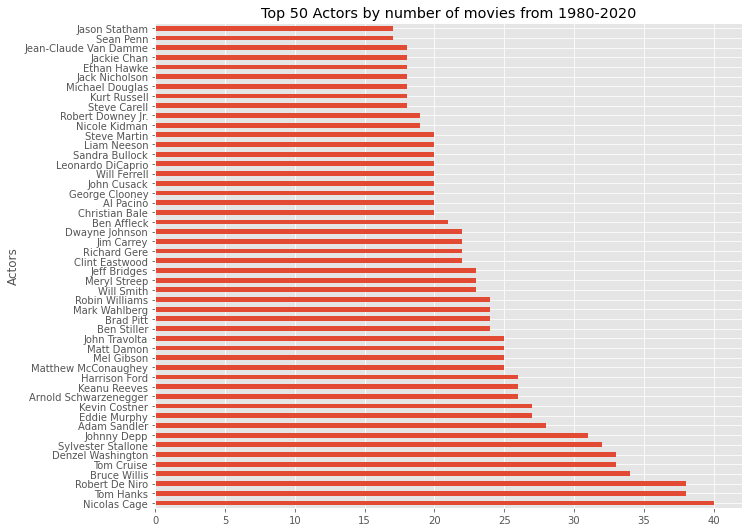

In [186]:
#movies between 1980-2020 starring RDJ                           
#print(df['name'][df.star.str.contains('Robert Downey Jr.')])
#print('Total no.of movies:', df['name'][df.star.str.contains('Robert Downey Jr.')].value_counts().sum())

#maybe better to groupby 'star' and then analyse
star_grp = df.groupby('star')

#see all the movies the main star has acted in
print(star_grp['name'].value_counts())

#apply function to get total no.of movies per star
movies_per_star = star_grp['name'].apply(lambda x: len(x))
movies_per_star.sort_values(ascending = False)[:50].plot(kind='barh',ylabel ='Number of Movies',xlabel ='Actors',
                                                         title ='Top 50 Actors by number of movies from 1980-2020',width=0.5)


In [187]:
#profit% by country
piv = pd.pivot_table(df, index=['country'],aggfunc = {'gross_billion':np.sum,'budget_billion':np.sum} , values=['gross_billion','budget_billion'])
piv['profit_%'] = np.round(((piv['gross_billion']-piv['budget_billion'])/piv['gross_billion'])*100,2)
piv = piv.reset_index()
piv


,country,budget_billion,gross_billion,profit_%
0,Argentina,0.006800,0.078136,91.30
1,Aruba,0.030000,0.010320,-190.70
2,Australia,1.080950,2.800304,61.40
3,Austria,0.038900,0.083563,53.45
4,Belgium,0.108100,0.022933,-371.38
5,Brazil,0.031900,0.040575,21.38
6,Canada,2.542177,5.734558,55.67
7,Chile,0.026000,0.027972,7.05
8,China,1.846400,6.305919,70.72
9,Colombia,0.003000,0.012595,76.18


In [188]:
#prepping iso_country code file (copied codes from wikipedia onto excel)
df_iso = pd.read_csv('iso3_codes.csv', encoding = "ISO-8859-1", names=['country'],header=None)
df_iso['country_name'] = df_iso['country'].str[3:]
df_iso['country_code'] = df_iso['country'].str[:4]
df_iso = df_iso.drop(columns = ['country'])

#df_iso.to_csv('iso_codes.csv',index=False)

'''MISTAKE: reason for merge not working

df_iso['country_name'].apply(lambda x: len(x)) we see how the strings dont match, there is some extra 
special character 'Â' in both columns, I exported to excel and simply did a find and replace.

'''
#reading in new csv 
df_iso_new = pd.read_csv('iso_codes.csv')
df_iso_new

#now merge works perfectly, we drop yugoslavia and west germany, also do some manual changes
merged = piv.merge(df_iso_new, left_on='country', right_on='country_name', how='left')

merged.iloc[10,5] = 'CZE'
merged.iloc[21,5] = 'IRN'
merged.iloc[36,5] = 'MKD'
merged.iloc[37,5] = 'RUS'
merged.iloc[39,5] = 'KOR'
merged.iloc[43,5] = 'TWN'
merged.iloc[46,5] = 'GBR'
merged.iloc[47,5] = 'USA'

merged = merged.drop(columns=['country_name'])
merged = merged.dropna()
merged = merged.drop(merged.index[[43]]).reset_index(drop=True)          #thailand seems an outlier, hence dropped
merged


#we use hist to plot the distribution of profit_% to decide the scheme for geopandas choropleth, 
#it seems highly skewed so maybe its better we dont use equal intervals scheme and try naturalbreaks.
#merged['profit_%'].hist(bins=10) 

,country,budget_billion,gross_billion,profit_%,country_code
0,Argentina,0.006800,0.078136,91.30,ARG
1,Aruba,0.030000,0.010320,-190.70,ABW
2,Australia,1.080950,2.800304,61.40,AUS
3,Austria,0.038900,0.083563,53.45,AUT
4,Belgium,0.108100,0.022933,-371.38,BEL
5,Brazil,0.031900,0.040575,21.38,BRA
6,Canada,2.542177,5.734558,55.67,CAN
7,Chile,0.026000,0.027972,7.05,CHL
8,China,1.846400,6.305919,70.72,CHN
9,Colombia,0.003000,0.012595,76.18,COL


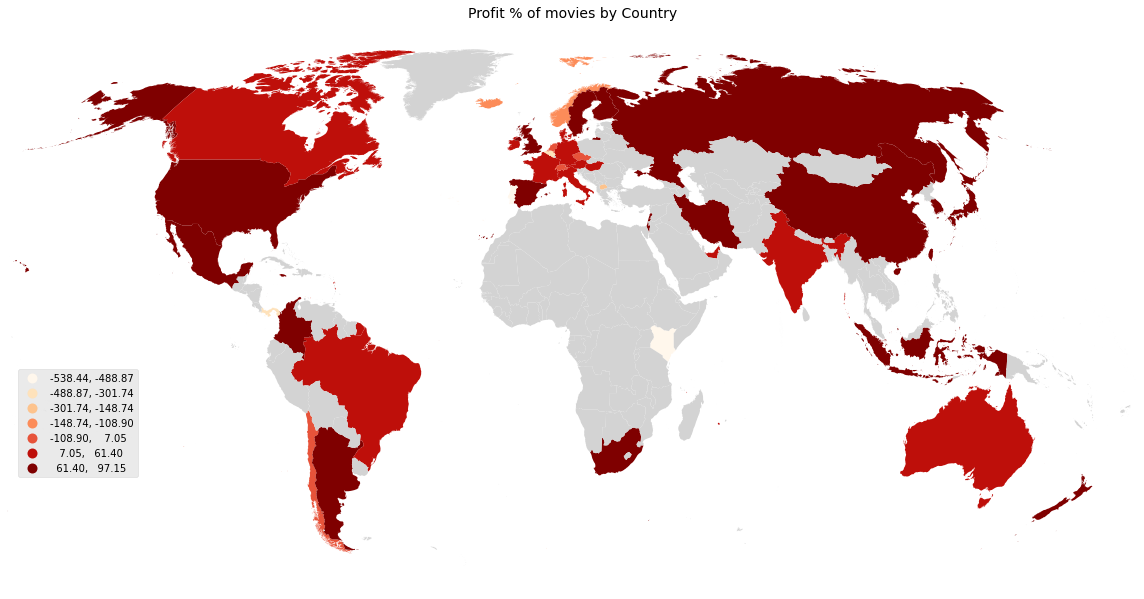

In [191]:
#plotting using geopandas
#(see: https://ramiro.org/notebook/geopandas-choropleth/)

colors = 7          #ideally its best to use less as it gets easier for the reader
cmap = 'OrRd'
figsize = (16, 10)     
title = 'Profit % of movies by Country'

#reading in folder containing shapefile
gdf = gpd.read_file('ne_10m_admin_0_countries')[['ADM0_A3', 'geometry']].to_crs('+proj=robin')

#we merge gdf with our data
merged_new = gdf.merge(merged, left_on='ADM0_A3', right_on='country_code', how='outer')

#I remove antarctica
merged_new = merged_new[merged_new.ADM0_A3 != 'ATA']

#plotting geodata
ax = merged_new.plot(column='profit_%', cmap=cmap, figsize=figsize, scheme='naturalbreaks', k=colors, legend=True)
merged_new[merged_new.isna().any(axis = 1)].plot(ax = ax, color = 'lightgrey')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.set_title(title, fontdict = {'fontsize': 14}, loc = 'center')
ax.set_facecolor('w')